In [1]:
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
% matplotlib inline

import csv

Data available at https://docs.google.com/spreadsheets/d/149D2ZnFfmfH9UDmy9tvqyGh5oS1omemDYmhb1ASbzvo/edit?ts=5ba53f8b#gid=449178002
    

In [10]:
data = pd.read_excel('PARTICIPANT LISTS - 2013-present.xlsx', sheet_name=None,header=1)
data['2018'].head()

,P/I,NAME,E-MAIL,AFFILIATION TYPE,AFFILIATION NAME,COUNTRY,TYPE,COUNTRY.1,START DATE,LENGTH (# OF DAYS),100 LEVEL (INTRO),200 LEVEL (INTERMEDIATE),300 LEVEL (ADVANCED)
0,P,Susana Beatriz Adamo,sadamo@ciesin.columbia.edu,Academia,CIESIN-Columbia University,United States,Symposium,United States,2018-03-19,3.0,2.0,1.0,0.0
1,P,SoEun Ahn,seahn@kei.re.kr,NaN,Korea Environment Institute,South Korea,Symposium,United States,2018-03-19,3.0,2.0,1.0,0.0
2,P,Mustapha Alhassan,NaN,NaN,NaN,NaN,Symposium,United States,2018-03-19,3.0,2.0,1.0,0.0
3,P,Karen Allen,karen.allen@furman.edu,Academia; Government,Furman University,United States,Symposium,United States,2018-03-19,3.0,2.0,1.0,0.0
4,P,Ginger Allington,gallington@gwu.edu,Academia,George Washington University,United States,Symposium,United States,2018-03-19,3.0,2.0,1.0,0.0


# Total attendance

## Make dataframes

In [11]:
## Explanations (no need to run this cell)

# years
data.keys()

# number of participants (P) for year yr
len(data[yr][data[yr]['P/I']=='P'])

# number of Symposium participants for year yr
len(data[yr][(data[yr]['P/I']=='P') & (data[yr]['TYPE']=='Symposium')])

# number of trainee/days (P) for year yr
data[yr][data[yr]['P/I']=='P']['LENGTH\n(# OF DAYS)'].sum()

# number of Symposium trainee/days for year yr
data[yr][(data[yr]['P/I']=='P') & (data[yr]['TYPE']=='Symposium')]['LENGTH\n(# OF DAYS)'].sum()

300.0

In [12]:
### People trained

attendance = pd.DataFrame()

# years 
for yr in data.keys():

    attendance = attendance.append({'year': yr,

                                    # number of participants (P) for year yr
                                    'Total' : len(data[yr][data[yr]['P/I']=='P']), 

                                    # number of participants for year yr per type
                                    'Intro' : len(data[yr][(data[yr]['P/I']=='P') & (data[yr]['TYPE']=='Intro')]),
                                    'Nodal' : len(data[yr][(data[yr]['P/I']=='P') & (data[yr]['TYPE']=='Nodal')]),
                                    'Partner':len(data[yr][(data[yr]['P/I']=='P') & (data[yr]['TYPE']=='Partner')]),
                                    'Public': len(data[yr][(data[yr]['P/I']=='P') & (data[yr]['TYPE']=='Public')]),
                                    'Regional': len(data[yr][(data[yr]['P/I']=='P') & (data[yr]['TYPE']=='Regional')]),
                                    'Seminar': len(data[yr][(data[yr]['P/I']=='P') & (data[yr]['TYPE']=='Seminar')]),
                                    'Symposium': len(data[yr][(data[yr]['P/I']=='P') & (data[yr]['TYPE']=='Symposium')]),
                                    'Webinar': len(data[yr][(data[yr]['P/I']=='P') & (data[yr]['TYPE']=='Webinar')]),
                                    'Other training': len(data[yr][(data[yr]['P/I']=='P') & (data[yr]['TYPE']=='nan')])
                                      },
                                   ignore_index=True)

attendance['Other trainings'] = attendance['Total'] - attendance['Symposium']   
attendance = attendance.sort_values('year')
attendance = attendance.set_index('year')
#attendance

In [13]:
### Trainee/days

attendanceTD = pd.DataFrame()

# years 
for yr in data.keys():
    attendanceTD = attendanceTD.append({'year': yr,
                                    
                                    # number of participants (P) for year yr
                                    'Total':data[yr][data[yr]['P/I']=='P']['LENGTH\n(# OF DAYS)'].sum(),
                                    
                                    # number of participants for year yr per type
                                    'Intro' : data[yr][(data[yr]['P/I']=='P') & (data[yr]['TYPE']=='Intro')]['LENGTH\n(# OF DAYS)'].sum(),
                                    'Nodal' : data[yr][(data[yr]['P/I']=='P') & (data[yr]['TYPE']=='Nodal')]['LENGTH\n(# OF DAYS)'].sum(),
                                    'Partner': data[yr][(data[yr]['P/I']=='P') & (data[yr]['TYPE']=='Partner')]['LENGTH\n(# OF DAYS)'].sum(),
                                    'Public': data[yr][(data[yr]['P/I']=='P') & (data[yr]['TYPE']=='Public')]['LENGTH\n(# OF DAYS)'].sum(),
                                    'Regional': data[yr][(data[yr]['P/I']=='P') & (data[yr]['TYPE']=='Regional')]['LENGTH\n(# OF DAYS)'].sum(),
                                    'Seminar': data[yr][(data[yr]['P/I']=='P') & (data[yr]['TYPE']=='Seminar')]['LENGTH\n(# OF DAYS)'].sum(),
                                    'Symposium': data[yr][(data[yr]['P/I']=='P') & (data[yr]['TYPE']=='Symposium')]['LENGTH\n(# OF DAYS)'].sum(),
                                    'Webinar': data[yr][(data[yr]['P/I']=='P') & (data[yr]['TYPE']=='Webinar')]['LENGTH\n(# OF DAYS)'].sum(),
                                    #'Other training': data[yr][(data[yr]['P/I']=='P') & (data[yr]['TYPE']=='nan')]['LENGTH\n(# OF DAYS)'].sum()
                                    
                                    # number of participants for year yr per level
                                    'Intro level' : data[yr][data[yr]['P/I']=='P']['100 LEVEL\n(INTRO)'].sum(),
                                    'Intermediate' : data[yr][data[yr]['P/I']=='P']['200 LEVEL\n(INTERMEDIATE)'].sum(),
                                    'Advanced' : data[yr][data[yr]['P/I']=='P']['300 LEVEL\n(ADVANCED)'].sum()
                                    },
                                     
                                   ignore_index=True)

attendanceTD['Other trainings'] = attendanceTD['Total'] - attendanceTD['Symposium']   
attendanceTD = attendanceTD.sort_values('year')
attendanceTD = attendanceTD.set_index('year')
#attendanceTD

In [14]:
## Export attendance tables

In [15]:
attendance.to_csv('Outputs/Table_Attendance_People.csv')
attendanceTD.to_csv('Outputs/Table_Attendance_TraineeDays.csv')

In [27]:
attendanceTD

,Advanced,Intermediate,Intro,Intro level,Nodal,Partner,Public,Regional,Seminar,Symposium,Total,Webinar,Other trainings
year,,,,,,,,,,,,,
2013,139.0,509.75,114.75,973.750,163.5,705.5,95.0,237.5,0.0,300.0,1622.500,6.250,1322.500
2014,58.5,368.00,109.50,507.810,54.0,179.0,0.0,280.5,0.0,360.0,1013.310,30.310,653.310
2015,93.5,637.00,13.00,849.497,204.0,750.0,0.0,0.0,70.0,624.0,1668.497,7.497,1044.497
2016,15.0,90.50,0.00,913.500,0.0,264.5,0.0,66.5,0.0,688.0,1019.000,0.000,331.000
2017,8.0,389.00,0.00,1727.000,0.0,942.0,0.0,126.0,0.0,1056.0,2124.000,0.000,1068.000
2018,0.0,340.00,0.00,1770.000,18.0,1221.0,0.0,48.0,0.0,823.0,2110.000,0.000,1287.000


## Total attendance (Sympo/not)

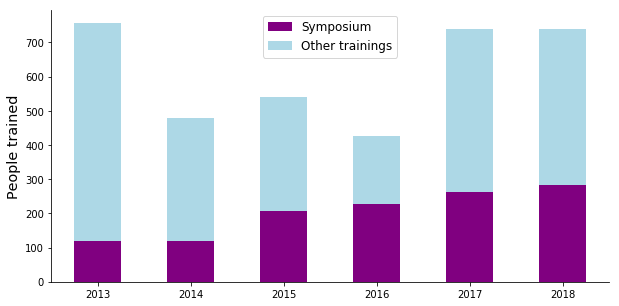

In [16]:
a = attendance.loc[:,['Symposium','Other trainings']].plot.bar(stacked=True, color=['purple','lightblue'], figsize=(10,5))

# Axis
plt.xticks(rotation='horizontal');
plt.ylabel('People trained',fontsize='x-large');
plt.xlabel('');

# Legend
plt.legend(fontsize='large')

# Style
a.spines['top'].set_visible(False)
a.spines['right'].set_visible(False)

plt.savefig('Outputs/Attendance_Peopletrained(barplot).png',bbox_inches='tight')


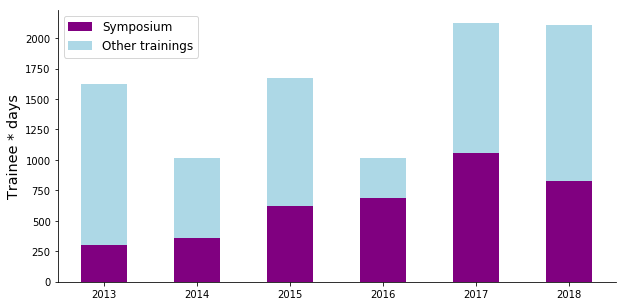

In [17]:
a = attendanceTD.loc[:,['Symposium','Other trainings']].plot.bar(stacked=True, color=['purple','lightblue'], figsize=(10,5))

# Axis
plt.xticks(rotation='horizontal');
plt.ylabel('Trainee * days',fontsize='x-large');
plt.xlabel('');

# Legend
plt.legend(fontsize='large')

# Style
a.spines['top'].set_visible(False)
a.spines['right'].set_visible(False)

plt.savefig('Outputs/Attendance_Traineedays(barplot).png',bbox_inches='tight')


## Per training type

In [18]:
TYPE_list = []
for yr in data.keys():
    TYPE_list += data[yr]['TYPE'].unique().tolist()

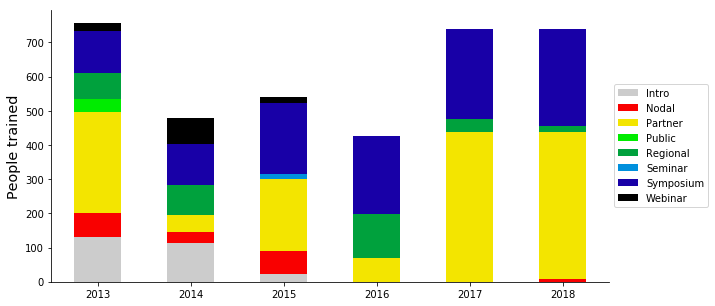

In [19]:
# People trained

TYPE_list_ = ['Intro','Nodal','Partner','Public',
              'Regional','Seminar','Symposium',
              'Webinar']#,'Other trainings']

a = attendance.loc[:,TYPE_list_].plot.bar(stacked=True, figsize=(10,5),colormap='nipy_spectral_r')

# Axis
plt.xticks(rotation='horizontal');
plt.ylabel('People trained',fontsize='x-large');
plt.xlabel('');

# Legend
plt.legend(fontsize='x-large')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Style
a.spines['top'].set_visible(False)
a.spines['right'].set_visible(False)

plt.savefig('Outputs/Attendance_by_type_Peopletrained(barplot).png',bbox_inches='tight')


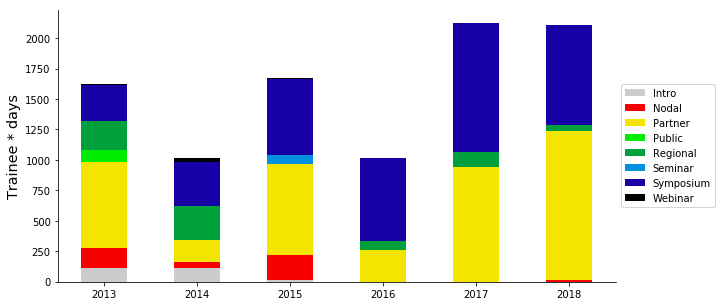

In [20]:
# Trainee*days,

TYPE_list_ = ['Intro','Nodal','Partner','Public',
              'Regional','Seminar','Symposium',
              'Webinar']#,'Other trainings']

#colorz = ['lightblue','darkorange','darkgreen','pink','lig']

a = attendanceTD.loc[:,TYPE_list_].plot.bar(stacked=True, figsize=(10,5),colormap='nipy_spectral_r')

# Axis
plt.xticks(rotation='horizontal');
plt.ylabel('Trainee * days',fontsize='x-large'); 
plt.xlabel('');

# Legend
plt.legend(fontsize='x-large')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Style
a.spines['top'].set_visible(False)
a.spines['right'].set_visible(False)

plt.savefig('Outputs/Attendance_by_type_Traineedays(barplot).png',bbox_inches='tight')


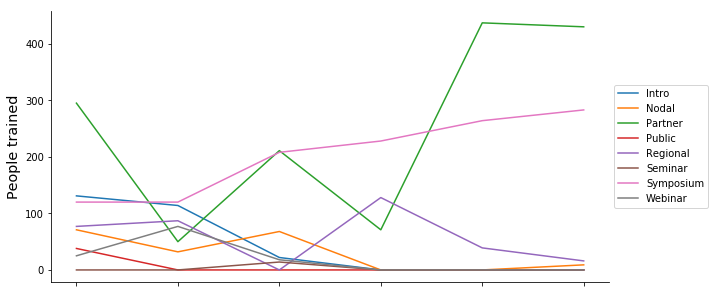

In [21]:
# People trained

TYPE_list_ = ['Intro','Nodal','Partner','Public',
              'Regional','Seminar','Symposium',
              'Webinar']#,'Other trainings']

a = attendance.loc[:,TYPE_list_].plot.line(figsize=(10,5))

# Axis
plt.xticks(rotation='horizontal');
plt.ylabel('People trained',fontsize='x-large');
plt.xlabel('');

# Legend
plt.legend(fontsize='x-large')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Style
a.spines['top'].set_visible(False)
a.spines['right'].set_visible(False)

plt.savefig('Outputs/Attendance_by_type_Peopletrained(lineplot).png',bbox_inches='tight')


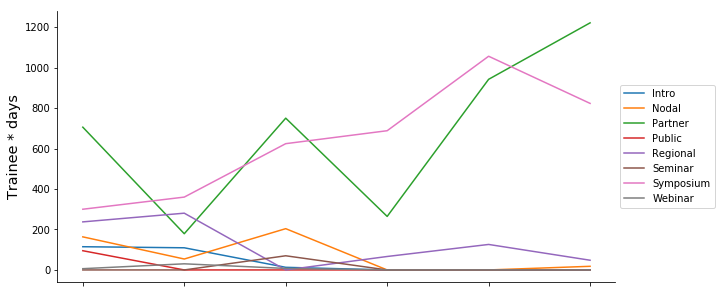

In [22]:
# Trainee*days

TYPE_list_ = ['Intro','Nodal','Partner','Public',
              'Regional','Seminar','Symposium',
              'Webinar']#,'Other trainings']

a = attendanceTD.loc[:,TYPE_list_].plot.line(figsize=(10,5))

# Axis
plt.xticks(rotation='horizontal');
plt.ylabel('Trainee * days',fontsize='x-large'); 
plt.xlabel('');

# Legend
plt.legend(fontsize='x-large')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Style
a.spines['top'].set_visible(False)
a.spines['right'].set_visible(False)

plt.savefig('Outputs/Attendance_by_type_Traineedays(lineplot).png',bbox_inches='tight')


## Total attendance per level

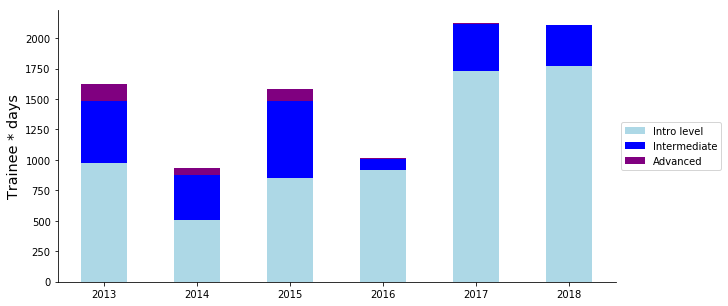

In [23]:
# Only trainee*days

# Trainee*days

Levels = ['Intro level','Intermediate','Advanced']

a = attendanceTD.loc[:,Levels].plot.bar(stacked=True, figsize=(10,5),color=['lightblue','blue','purple'])

# Axis
plt.xticks(rotation='horizontal');
plt.ylabel('Trainee * days',fontsize='x-large'); 
plt.xlabel('');

# Legend
plt.legend(fontsize='x-large')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Style
a.spines['top'].set_visible(False)
a.spines['right'].set_visible(False)

plt.savefig('Outputs/Attendance_by_level_Traineedays(barplot).png',bbox_inches='tight')


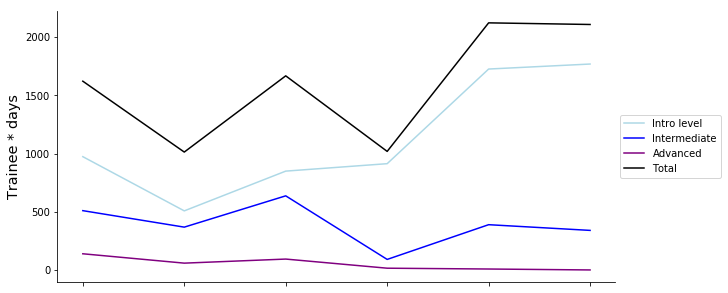

In [24]:
# Only trainee*days

# Trainee*days

Levels = ['Intro level','Intermediate','Advanced','Total']

a = attendanceTD.loc[:,Levels].plot.line(figsize=(10,5),color=['lightblue','blue','purple','black'])

# Axis
plt.xticks(rotation='horizontal');
plt.ylabel('Trainee * days',fontsize='x-large'); 
plt.xlabel('');

# Legend
plt.legend(fontsize='x-large')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Style
a.spines['top'].set_visible(False)
a.spines['right'].set_visible(False)

plt.savefig('Outputs/Attendance_by_level_Traineedays(lineplot).png',bbox_inches='tight')


# Countries

## Number of countries from where are attendees

In [25]:
Country_Attendees_list = []
for yr in data.keys():
    Country_Attendees_list += data[yr]['COUNTRY'].unique().tolist()
    
Country_Attendees_set = set(Country_Attendees_list)

#len(Country_Attendees_set)

with open('Outputs/Countries_of_Attendees_'+str(len(Country_Attendees_set))+'.csv', "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for val in sorted(list(Country_Attendees_set)[1:]):
        writer.writerow([val])

## Number of countries in which we train

In [26]:
Country_Training_list = []
for yr in data.keys():
    Country_Training_list += data[yr]['COUNTRY.1'].unique().tolist()
    
Country_Training_set = set(Country_Training_list)

#len(Country_Training_set)

with open('Outputs/Countries_where_Training_'+str(len(Country_Training_set))+'.csv', "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for val in sorted(list(Country_Training_set)[1:]):
        writer.writerow([val])